In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
data = pd.read_csv(r'C:\Users\LENOVO\Desktop\gld_price_data.csv') 

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
data.shape

(2290, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [16]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [17]:
correlation = data.corr()

<AxesSubplot:>

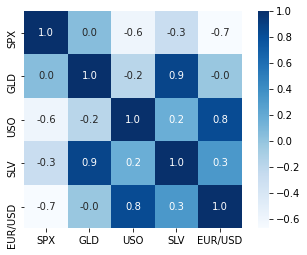

In [24]:
sns.heatmap(correlation,annot=True,cbar=True,square=True,fmt='.1f',cmap='Blues')

In [25]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


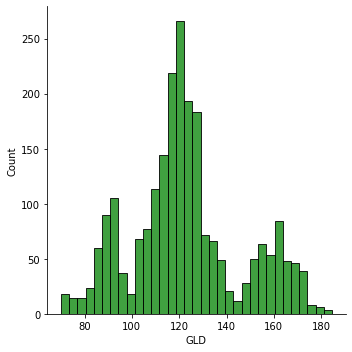

In [27]:
sns.displot(data['GLD'],color='green')

In [28]:
X = data.drop(['Date','GLD'],axis=1)
Y = data['GLD']

In [31]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [48]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,train_size=0.2,random_state=5)

In [49]:
print(X_test.shape,X_train.shape,Y_train.shape,Y_test.shape)

(1832, 4) (458, 4) (458,) (1832,)


In [50]:
regressor = RandomForestRegressor(n_estimators=100)

In [51]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [52]:
test_data_prediction = regressor.predict(X_test)

In [53]:
print(test_data_prediction)

[119.93219959 162.64160139 134.52970294 ... 137.34930253 118.72240121
 128.88849974]


In [55]:
error = metrics.r2_score(Y_test,test_data_prediction)
print(f'(R square error is : {error})')

(R square error is : 0.9803141049804873)


In [56]:
Y_test = list(Y_test)

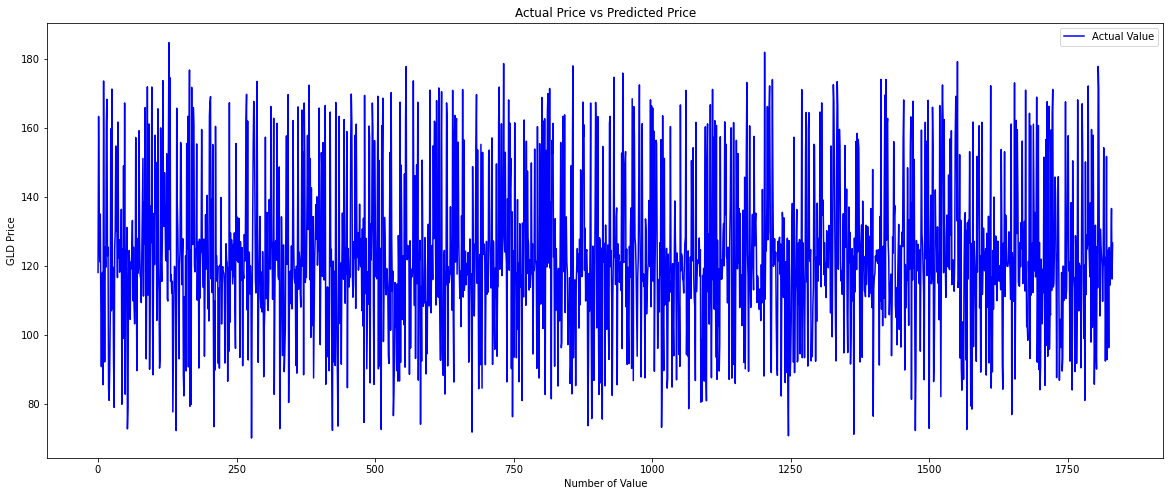

In [60]:
plt.figure(figsize=(20,8))
plt.plot(Y_test,color='blue',label='Actual Value')
# plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Value')
plt.ylabel('GLD Price')
plt.legend()
plt.show()